In [1]:
#import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.decomposition import PCA


In [2]:
#data preprocessing, cleaning and a little sorting
health_data_raw=pd.read_stata('Data Sets_Other/sect3_health.dta')
health_data=pd.read_stata('Data Sets_Other/sect3_health.dta',convert_categoricals=False,preserve_dtypes=False,convert_missing=False)
health_data=health_data.fillna(0)
health_data
#health_data.describe()
#health_data_raw
#health_data_raw.describe()
#sea.pairplot(health_data)

,zone,state,lga,sector,ea,hhid,indiv,s03q01,s03q02,s03q03,...,s03q25,s03q26,s03q27,s03q28,s03q29,s03q30,s03q31,s03q32,s03q32_os,s03q33
0,2,2,204,2,10001,2040001,1,1.0,0.0,2.0,...,1.0,3.0,1.0,1,2.0,0.0,1.0,6.0,,0.0
1,2,2,204,2,10001,2040001,2,1.0,0.0,2.0,...,1.0,1.0,1.0,2,0.0,0.0,1.0,6.0,,0.0
2,2,2,204,2,10001,2040001,3,1.0,0.0,1.0,...,1.0,1.0,1.0,2,0.0,0.0,2.0,0.0,,0.0
3,2,2,204,2,10001,2040001,4,2.0,2.0,2.0,...,1.0,1.0,1.0,2,0.0,0.0,2.0,0.0,,0.0
4,2,2,204,2,10001,2040001,5,2.0,2.0,2.0,...,1.0,1.0,1.0,2,0.0,0.0,2.0,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16406,2,34,3413,2,10245,34130179,3,1.0,0.0,1.0,...,1.0,1.0,1.0,2,0.0,0.0,2.0,0.0,,0.0
16407,2,34,3413,2,10245,34130180,1,1.0,0.0,1.0,...,1.0,1.0,1.0,1,2.0,0.0,2.0,0.0,,0.0
16408,2,34,3413,2,10245,34130180,2,2.0,1.0,2.0,...,1.0,1.0,1.0,2,0.0,0.0,2.0,0.0,,0.0
16409,2,34,3413,2,10245,34130180,3,1.0,0.0,1.0,...,1.0,1.0,1.0,2,0.0,0.0,2.0,0.0,,0.0


In [3]:
health_data_raw.head()

,zone,state,lga,sector,ea,hhid,indiv,s03q01,s03q02,s03q03,...,s03q25,s03q26,s03q27,s03q28,s03q29,s03q30,s03q31,s03q32,s03q32_os,s03q33
0,2. North East,2. Adamawa,204. GIREI,2. Rural,10001,2040001,1,1. YES,NaN,2. NO,...,"1. No, no difficulty","3. Yes, a lot","1. No, no difficulty",1. YES,2. NO,NaN,1. YES,6. NGO,,0. NOTHING/FREE
1,2. North East,2. Adamawa,204. GIREI,2. Rural,10001,2040001,2,1. YES,NaN,2. NO,...,"1. No, no difficulty","1. No, no difficulty","1. No, no difficulty",2. NO,NaN,NaN,1. YES,6. NGO,,0. NOTHING/FREE
2,2. North East,2. Adamawa,204. GIREI,2. Rural,10001,2040001,3,1. YES,NaN,1. YES,...,"1. No, no difficulty","1. No, no difficulty","1. No, no difficulty",2. NO,NaN,NaN,2. NO,NaN,,NaN
3,2. North East,2. Adamawa,204. GIREI,2. Rural,10001,2040001,4,2. NO,2.0,2. NO,...,"1. No, no difficulty","1. No, no difficulty","1. No, no difficulty",2. NO,NaN,NaN,2. NO,NaN,,NaN
4,2. North East,2. Adamawa,204. GIREI,2. Rural,10001,2040001,5,2. NO,2.0,2. NO,...,"1. No, no difficulty","1. No, no difficulty","1. No, no difficulty",2. NO,NaN,NaN,2. NO,NaN,,NaN


In [22]:
health_data.columns

Index(['zone', 'state', 'lga', 'sector', 'ea', 'hhid', 'indiv', 's03q01',
       's03q02', 's03q03', 's03q04_1', 's03q04_2', 's03q05', 's03q06_1',
       's03q06_2', 's03q06_os', 's03q07a', 's03q08', 's03q09', 's03q10_1',
       's03q10_2', 's03q10_os', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q12', 's03q12_os', 's03q13', 's03q13_os',
       's03q14', 's03q15', 's03q16a', 's03q16b', 's03q17', 's03q18', 's03q18b',
       's03q18b_os', 's03q19', 's03q20', 's03q21', 's03q22', 's03q23',
       's03q24', 's03q25', 's03q26', 's03q27', 's03q28', 's03q29', 's03q30',
       's03q31', 's03q32', 's03q32_os', 's03q33'],
      dtype='object')

In [4]:
#data for the south west for past 30 days
southwest_total_data=health_data.loc[health_data['zone']==6,['state','sector','s03q03','s03q04_1','s03q04_2',
       's03q05','s03q06_1','s03q06_2','s03q07a','s03q08','s03q09', 's03q10_1',
       's03q10_2', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q12', 's03q13',
       's03q14', 's03q15', 's03q16a', 's03q16b', 's03q17', 's03q18', 's03q18b']]
#state_zone=health_data.loc[health_data['zone']<=6,['state','zone']]
#state_zone=state_zone.loc[state_zone['state']==24,:]
#sea.pairplot(southwest_total_data)
southwest_total_data

,state,sector,s03q03,s03q04_1,s03q04_2,s03q05,s03q06_1,s03q06_2,s03q07a,s03q08,...,s03q11__5,s03q12,s03q13,s03q14,s03q15,s03q16a,s03q16b,s03q17,s03q18,s03q18b
2109,13,2,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,13,2,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,13,2,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2112,13,2,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2113,13,2,1.0,1.0,0.0,0.0,2.0,26.0,4.0,1.0,...,0.0,1.0,9.0,1000.0,100.0,30.0,2.0,1.0,5000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14149,30,2,2.0,0.0,0.0,1.0,2.0,0.0,4.0,1.0,...,0.0,1.0,9.0,300.0,800.0,4.0,1.0,2.0,0.0,2.0
14150,30,2,2.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,...,0.0,1.0,9.0,500.0,800.0,3.0,1.0,2.0,0.0,11.0
14151,30,2,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14152,30,2,2.0,0.0,0.0,1.0,2.0,8.0,3.0,1.0,...,0.0,1.0,9.0,300.0,800.0,2.0,1.0,1.0,1500.0,2.0


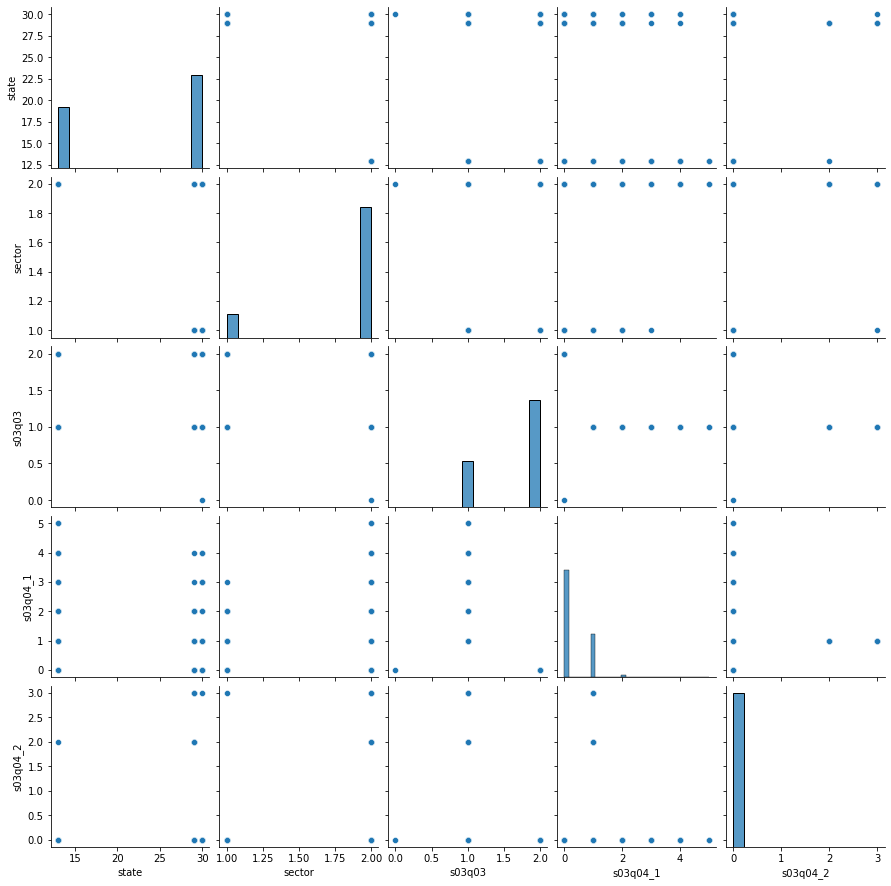

In [5]:
#data plotting
sw_plot_1=southwest_total_data.loc[:,['state','sector','s03q03','s03q04_1','s03q04_2']]
sea.pairplot(sw_plot_1)


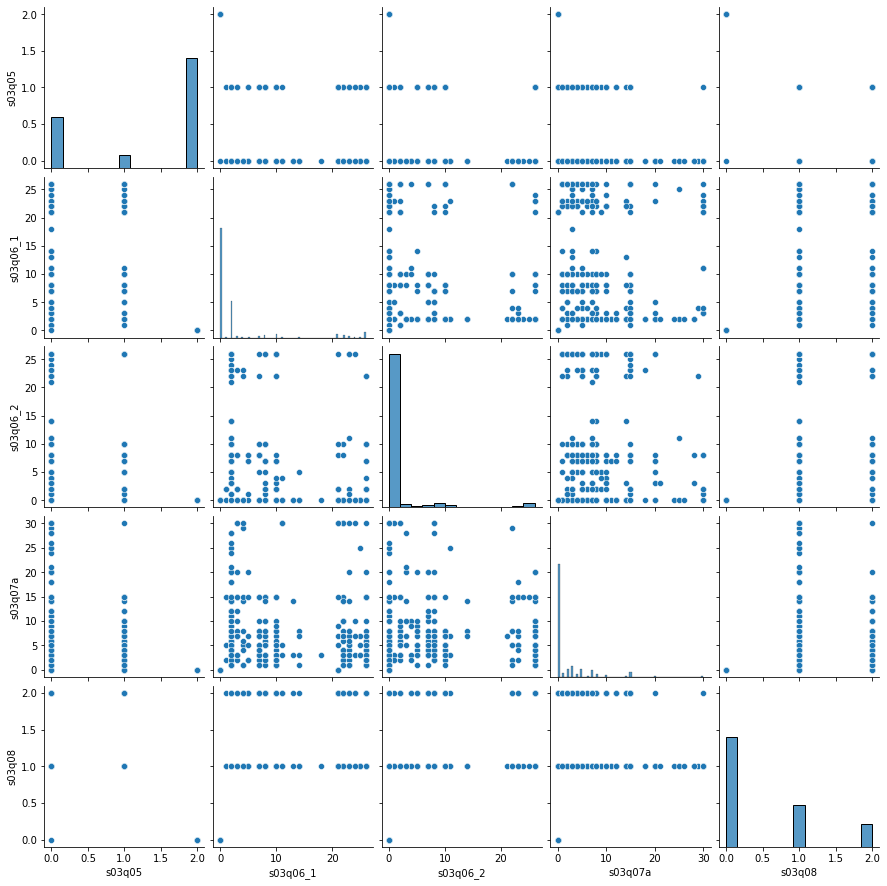

In [6]:
#data plotting
sw_plot_2=southwest_total_data.loc[:,['s03q05','s03q06_1','s03q06_2','s03q07a','s03q08']]
sea.pairplot(sw_plot_2)

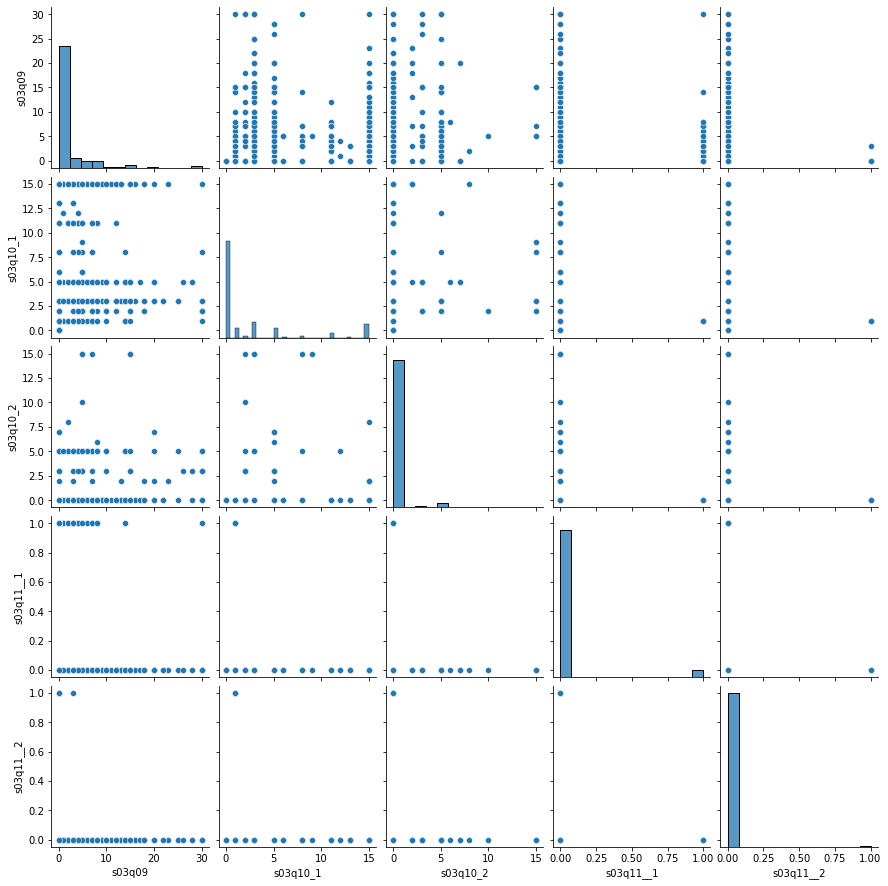

In [7]:
#data plotting
sw_plot_3=southwest_total_data.loc[:,['s03q09', 's03q10_1','s03q10_2', 's03q11__1', 's03q11__2']]
sea.pairplot(sw_plot_3)

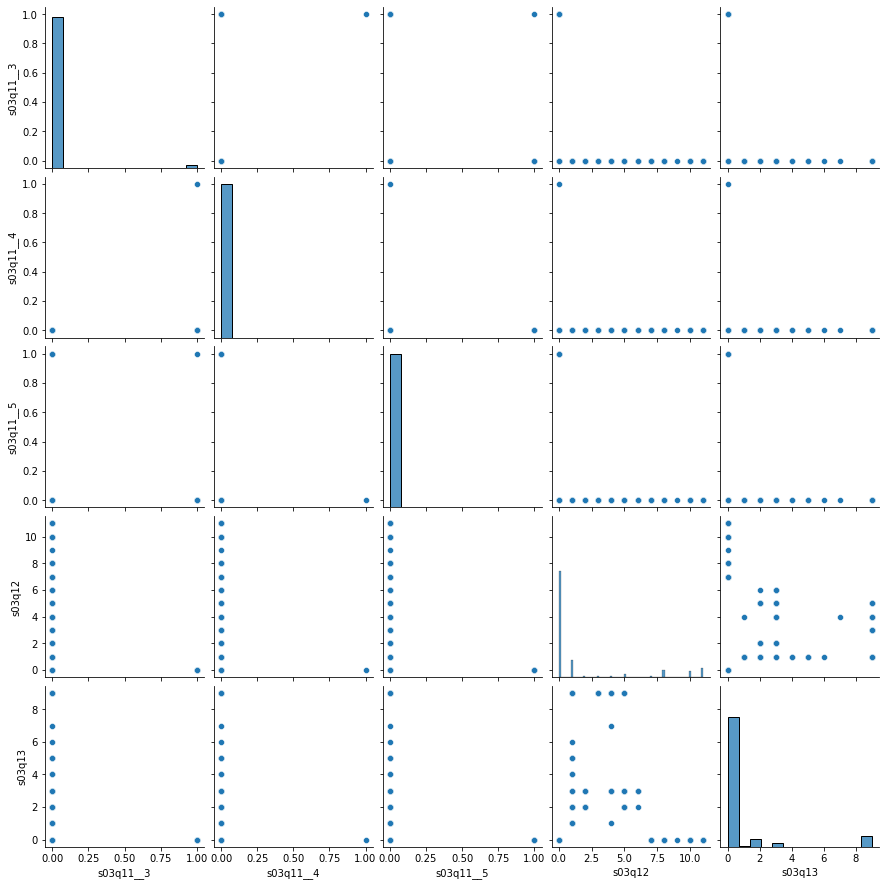

In [8]:
#data plotting
sw_plot_4=southwest_total_data.loc[:,['s03q11__3','s03q11__4', 's03q11__5', 's03q12', 's03q13']]
sea.pairplot(sw_plot_4)

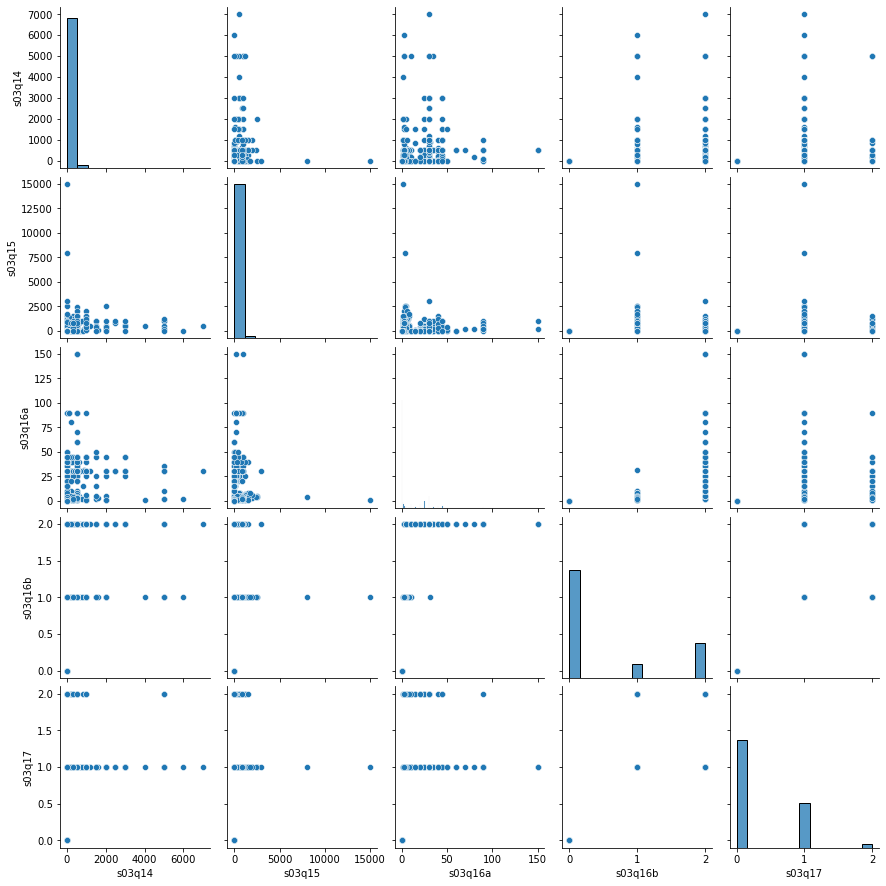

In [9]:
#data plotting
sw_plot_5=southwest_total_data.loc[:,['s03q14', 's03q15', 's03q16a', 's03q16b', 's03q17']]
sea.pairplot(sw_plot_5)

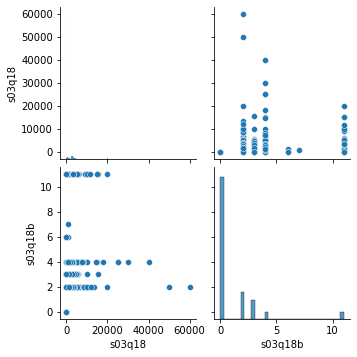

In [10]:
#data plotting
sw_plot_6=southwest_total_data.loc[:,[ 's03q18', 's03q18b']]
plot6=sea.pairplot(sw_plot_6)


In [6]:
#test for colinearity if needed (vif)
vifdatax=health_data.loc[health_data['zone']==6,['zone','state','sector','s03q04_1','s03q04_2',
       's03q05','s03q06_1','s03q06_2','s03q07a','s03q08','s03q09', 's03q10_1',
       's03q10_2', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q12', 's03q13',
       's03q14', 's03q15', 's03q16a', 's03q16b', 's03q17', 's03q18', 's03q18b']]


vif_data=pd.DataFrame()
vif_data['feature']=vifdatax.columns

vif_data['VIF']=[vif(vifdatax.values,i) for i in range(len(vifdatax.columns))]
print(vif_data)

      feature         VIF
0        zone  126.379359
1       state    1.283020
2      sector    1.155342
3    s03q04_1    2.411468
4    s03q04_2    1.071587
5      s03q05   15.748960
6    s03q06_1    1.710809
7    s03q06_2    1.260246
8     s03q07a    3.671035
9      s03q08    8.521257
10     s03q09    3.909443
11   s03q10_1   11.165224
12   s03q10_2    1.208677
13  s03q11__1    3.129934
14  s03q11__2    1.283692
15  s03q11__3    1.641351
16  s03q11__4    1.169566
17  s03q11__5    1.055591
18     s03q12   13.549558
19     s03q13    2.960139
20     s03q14    1.327161
21     s03q15    1.554728
22    s03q16a    3.966910
23    s03q16b   24.194978
24     s03q17    9.254953
25     s03q18    1.852098
26    s03q18b    2.136655


In [7]:
#dropping zone
vifdatax2=health_data.loc[health_data['zone']==6,['state','sector','s03q04_1','s03q04_2',
       's03q05','s03q06_1','s03q06_2','s03q07a','s03q08','s03q09', 's03q10_1',
       's03q10_2', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q12', 's03q13',
       's03q14', 's03q15', 's03q16a', 's03q16b', 's03q17', 's03q18', 's03q18b']]

vif2=pd.DataFrame()
vif2['features']=vifdatax2.columns

vif2['vif without zone']=[vif(vifdatax2.values,i) for i in range(len(vifdatax2.columns))]
print(vif2)

     features  vif without zone
0       state          9.676173
1      sector         21.228903
2    s03q04_1          2.945476
3    s03q04_2          1.075971
4      s03q05         21.573383
5    s03q06_1          2.047939
6    s03q06_2          1.366675
7     s03q07a          4.568601
8      s03q08         12.087358
9      s03q09          4.456681
10   s03q10_1         14.247174
11   s03q10_2          1.253104
12  s03q11__1          3.030307
13  s03q11__2          1.287912
14  s03q11__3          1.570109
15  s03q11__4          1.168333
16  s03q11__5          1.042877
17     s03q12         16.930420
18     s03q13          3.327298
19     s03q14          1.387409
20     s03q15          1.607263
21    s03q16a          4.786470
22    s03q16b         31.389877
23     s03q17         12.708499
24     s03q18          1.970719
25    s03q18b          2.619985


In [8]:
#dropping s03q16b
vifdatax3=health_data.loc[health_data['zone']==6,['state','sector','s03q04_1','s03q04_2',
       's03q05','s03q06_1','s03q06_2','s03q07a','s03q08','s03q09', 's03q10_1',
       's03q10_2', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q12', 's03q13',
       's03q14', 's03q15', 's03q16a', 's03q17', 's03q18', 's03q18b']]

vif3=pd.DataFrame()
vif3['features']=vifdatax3.columns

vif3['vif without s03q16b']=[vif(vifdatax3.values,i) for i in range(len(vifdatax3.columns))]
print(vif3)

     features  vif without s03q16b
0       state             9.631939
1      sector            20.843857
2    s03q04_1             2.870477
3    s03q04_2             1.075722
4      s03q05            21.139569
5    s03q06_1             2.046588
6    s03q06_2             1.365672
7     s03q07a             4.547949
8      s03q08            11.620837
9      s03q09             4.378667
10   s03q10_1            13.743133
11   s03q10_2             1.253074
12  s03q11__1             2.827063
13  s03q11__2             1.278112
14  s03q11__3             1.516592
15  s03q11__4             1.167528
16  s03q11__5             1.039716
17     s03q12            16.076017
18     s03q13             3.208642
19     s03q14             1.387347
20     s03q15             1.596120
21    s03q16a             2.415898
22     s03q17            11.175194
23     s03q18             1.969782
24    s03q18b             2.562827


In [9]:
#dropping s03q05
vifdatax4=health_data.loc[health_data['zone']==6,['state','sector','s03q04_1','s03q04_2',
       's03q06_1','s03q06_2','s03q07a','s03q08','s03q09', 's03q10_1',
       's03q10_2', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q12', 's03q13',
       's03q14', 's03q15', 's03q16a', 's03q17', 's03q18', 's03q18b']]

vif4=pd.DataFrame()
vif4['features']=vifdatax4.columns

vif4['vif without s03q05']=[vif(vifdatax4.values,i) for i in range(len(vifdatax4.columns))]
print(vif4)

     features  vif without s03q05
0       state            6.097718
1      sector            6.330041
2    s03q04_1            2.740638
3    s03q04_2            1.074633
4    s03q06_1            2.042511
5    s03q06_2            1.365662
6     s03q07a            4.543688
7      s03q08           10.714032
8      s03q09            4.317878
9    s03q10_1           13.708924
10   s03q10_2            1.251383
11  s03q11__1            2.711825
12  s03q11__2            1.274130
13  s03q11__3            1.470535
14  s03q11__4            1.166591
15  s03q11__5            1.034808
16     s03q12           15.951323
17     s03q13            3.111595
18     s03q14            1.387162
19     s03q15            1.592676
20    s03q16a            2.385899
21     s03q17           10.748048
22     s03q18            1.968390
23    s03q18b            2.535864


In [10]:
#dropping s03q12
vifdatax5=health_data.loc[health_data['zone']==6,['state','sector','s03q04_1','s03q04_2',
       's03q06_1','s03q06_2','s03q07a','s03q08','s03q09', 's03q10_1',
       's03q10_2', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q13',
       's03q14', 's03q15', 's03q16a', 's03q17', 's03q18', 's03q18b']]

vif5=pd.DataFrame()
vif5['features']=vifdatax5.columns

vif5['vif without s03q12']=[vif(vifdatax5.values,i) for i in range(len(vifdatax5.columns))]
print(vif5)

     features  vif without s03q12
0       state            6.096657
1      sector            6.326565
2    s03q04_1            2.730057
3    s03q04_2            1.072848
4    s03q06_1            2.041564
5    s03q06_2            1.365661
6     s03q07a            4.516364
7      s03q08           10.664574
8      s03q09            4.298487
9    s03q10_1            4.224135
10   s03q10_2            1.245882
11  s03q11__1            2.679302
12  s03q11__2            1.272134
13  s03q11__3            1.463381
14  s03q11__4            1.166484
15  s03q11__5            1.034655
16     s03q13            2.183749
17     s03q14            1.378289
18     s03q15            1.585710
19    s03q16a            2.384502
20     s03q17            9.520753
21     s03q18            1.949016
22    s03q18b            2.535808


In [5]:
#changing the values of 1 and 2 to yes and no respectively.
val2str=southwest_total_data.loc[:,'s03q03']

for i in southwest_total_data.index:
    if val2str[i]==1.0:
        southwest_total_data['s03q03'][i]='YES'
    else:
        southwest_total_data['s03q03'][i]='NO'



southwest_total_data.head(30)

<ipython-input-5-232bc1bf4345>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southwest_total_data['s03q03'][i]='NO'
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-5-232bc1bf4345>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southwest_total_data['s03q03'][i]='YES'


,state,sector,s03q03,s03q04_1,s03q04_2,s03q05,s03q06_1,s03q06_2,s03q07a,s03q08,...,s03q11__5,s03q12,s03q13,s03q14,s03q15,s03q16a,s03q16b,s03q17,s03q18,s03q18b
2109,13,2,NO,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,13,2,NO,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,13,2,NO,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2112,13,2,NO,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2113,13,2,YES,1.0,0.0,0.0,2.0,26.0,4.0,1.0,...,0.0,1.0,9.0,1000.0,100.0,30.0,2.0,1.0,5000.0,2.0
2114,13,2,YES,1.0,0.0,0.0,2.0,0.0,4.0,1.0,...,0.0,11.0,0.0,0.0,100.0,30.0,2.0,1.0,2000.0,11.0
2115,13,2,YES,1.0,0.0,0.0,2.0,10.0,3.0,1.0,...,0.0,11.0,0.0,0.0,100.0,30.0,2.0,1.0,3000.0,3.0
2116,13,2,NO,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2117,13,2,NO,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118,13,2,YES,1.0,0.0,0.0,8.0,7.0,8.0,1.0,...,0.0,1.0,9.0,1000.0,100.0,30.0,2.0,1.0,4000.0,3.0


In [6]:
#split data using 80/20 method and train and test
southwest_train, southwest_test= split(southwest_total_data,test_size=0.2)
southwest_train
southwest_test

,state,sector,s03q03,s03q04_1,s03q04_2,s03q05,s03q06_1,s03q06_2,s03q07a,s03q08,...,s03q11__5,s03q12,s03q13,s03q14,s03q15,s03q16a,s03q16b,s03q17,s03q18,s03q18b
2260,13,2,YES,4.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13609,30,2,YES,1.0,0.0,0.0,2.0,0.0,3.0,2.0,...,0.0,8.0,0.0,0.0,0.0,10.0,2.0,1.0,280.0,3.0
2417,13,2,YES,1.0,0.0,0.0,2.0,0.0,2.0,2.0,...,0.0,8.0,0.0,0.0,0.0,30.0,2.0,1.0,150.0,2.0
13470,29,1,YES,1.0,0.0,0.0,2.0,0.0,2.0,1.0,...,0.0,1.0,2.0,0.0,100.0,30.0,2.0,1.0,450.0,3.0
13330,29,2,NO,0.0,0.0,1.0,2.0,0.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13933,30,2,NO,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13210,29,2,YES,1.0,0.0,0.0,23.0,1.0,30.0,1.0,...,0.0,1.0,2.0,500.0,200.0,1.0,1.0,1.0,700.0,4.0
13320,29,1,NO,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13557,30,2,NO,0.0,0.0,1.0,2.0,0.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#logisitc regression
'''
visit_doc=health_data.loc[health_data['zone']==6,['state','sector','s03q03','s03q04_1','s03q04_2']]
val2str=visit_doc.loc[:,'s03q03']
for i in visit_doc.index:
    if val2str[i]==1.0:
        visit_doc['s03q03'][i]='YES'
    else:
        visit_doc['s03q03'][i]='NO'
        '''
visit_doc_model = LogisticRegression()
swtrainx= southwest_train.loc[:, ['sector', 's03q04_1', 's03q04_2',
       's03q05','s03q06_1','s03q06_2','s03q07a','s03q08','s03q09', 's03q10_1',
       's03q10_2', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q12', 's03q13',
       's03q14', 's03q15', 's03q16a', 's03q16b', 's03q17', 's03q18', 's03q18b']]
swtrainy= southwest_train.loc[:, ['s03q03']]
visit_doc_model.fit(swtrainx, swtrainy)
print(visit_doc_model.coef_)
#visit_doc_model.n_features_in_
#visit_doc_model


[[-9.37493816e-01  3.62442663e-01  4.46603739e-03 -1.29895485e+00
  -1.61230787e-02  3.95029521e-02  1.47134946e-01  6.60807187e-02
   7.68386653e-02  1.82158898e-01  3.25894679e-02  1.57896590e-02
  -5.32676092e-03  6.99497523e-03 -7.33307896e-04  3.87365920e-03
   1.87506281e-02  1.42268802e-01  1.80713593e-03 -2.39426637e-05
   6.97614076e-02  6.33806191e-02  4.91131668e-02 -6.46371781e-07
   4.91947412e-02]]


C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
#predition and summary
swtesttrue= southwest_test.loc[:, ['s03q03']]
swtestx= southwest_test.loc[:, ['sector', 's03q04_1', 's03q04_2',
       's03q05','s03q06_1','s03q06_2','s03q07a','s03q08','s03q09', 's03q10_1',
       's03q10_2', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q12', 's03q13',
       's03q14', 's03q15', 's03q16a', 's03q16b', 's03q17', 's03q18', 's03q18b']]
logmodel_pred=visit_doc_model.predict(swtestx)
print(metrics.classification_report(swtesttrue, logmodel_pred))
metrics.confusion_matrix(swtesttrue, logmodel_pred)
#metrics.f1_score(swtesttrue,logmodel_pred)

              precision    recall  f1-score   support

          NO       0.98      0.98      0.98       288
         YES       0.95      0.95      0.95       135

    accuracy                           0.97       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.97      0.97      0.97       423



array([[281,   7],
       [  7, 128]], dtype=int64)

In [10]:
#lda
visitdoc_ldamodel=LinearDiscriminantAnalysis()
visitdoc_ldamodel.fit(swtrainx, swtrainy)
visitdoc_ldamodel
visitdoc_ldamodel.coef_

C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[-8.70618848e-01,  6.63732357e+01,  4.26415489e+00,
        -1.19012565e+02, -5.61485987e-01, -2.05602977e-01,
         8.10029877e-01, -2.36556786e+01, -1.49389483e+00,
        -1.59283816e-01, -1.63891021e+00, -5.95658141e+01,
        -5.07670540e+01, -5.76877514e+01,  3.37363777e+01,
        -2.01939376e+01, -1.12320553e+00, -1.02478358e+00,
         6.79130726e-04, -8.89706203e-04,  5.12601972e-02,
        -5.67528643e+00, -1.66431835e+01, -4.10426849e-04,
        -1.20704143e+00]])

In [11]:
#prediction and summary
ldamodel_pred=visitdoc_ldamodel.predict(swtestx)
print(metrics.classification_report(swtesttrue, ldamodel_pred))
metrics.confusion_matrix(swtesttrue, ldamodel_pred)

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       288
         YES       1.00      1.00      1.00       135

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



array([[288,   0],
       [  0, 135]], dtype=int64)

In [13]:
#qda
visitdoc_qdamodel=QuadraticDiscriminantAnalysis()
visitdoc_qdamodel.fit(swtrainx, swtrainy)
visitdoc_qdamodel
visitdoc_qdamodel.get_params()

C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

In [14]:
#prediction and summary
qdamodel_pred=visitdoc_qdamodel.predict(swtestx)
print(metrics.classification_report(swtesttrue, qdamodel_pred))
metrics.confusion_matrix(swtesttrue, qdamodel_pred)

              precision    recall  f1-score   support

          NO       1.00      0.91      0.95       288
         YES       0.83      1.00      0.91       135

    accuracy                           0.94       423
   macro avg       0.92      0.95      0.93       423
weighted avg       0.95      0.94      0.94       423



array([[261,  27],
       [  0, 135]], dtype=int64)

In [15]:
#sorting data x and y
kcvx=southwest_total_data.loc[:,['sector','s03q04_1','s03q04_2',
       's03q05','s03q06_1','s03q06_2','s03q07a','s03q08','s03q09', 's03q10_1',
       's03q10_2', 's03q11__1', 's03q11__2', 's03q11__3',
       's03q11__4', 's03q11__5', 's03q12', 's03q13',
       's03q14', 's03q15', 's03q16a', 's03q16b', 's03q17', 's03q18', 's03q18b']]

kcvy=southwest_total_data.loc[:,['s03q03']]
kcvymae=health_data.loc[:,['s03q03']]

In [16]:
#cross validation with 7 folds for log regression
k=7
folds=KFold(n_splits=k)
accuracy=[]
metrep=[]

for train_index,test_index in folds.split(kcvx):
    #x_train=[],x_test=[],y_train=[],y_test=[]
    x_train,x_test= kcvx.iloc[train_index,:],kcvx.iloc[test_index,:]
    y_train,y_test= kcvy.iloc[train_index,:],kcvy.iloc[test_index,]

    #print(train_index,test_index)
    visit_doc_model.fit(x_train,y_train)
    y_pred=visit_doc_model.predict(x_test)
    metrep.append(metrics.classification_report(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    #mae.append(metrics.mean_absolute_error(y_test,y_pred))

#print(accuracy)

C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

In [33]:
#to collect mae data

#cross validation with 7 folds for log regression
k=7
folds=KFold(n_splits=k)


mae=[]
for train_index,test_index in folds.split(kcvx):
    #x_train=[],x_test=[],y_train=[],y_test=[]
    x_train,x_test= kcvx.iloc[train_index,:],kcvx.iloc[test_index,:]
    y_train,y_test= kcvymae.iloc[train_index,:],kcvymae.iloc[test_index,]

    #print(train_index,test_index)
    visit_doc_model.fit(x_train,y_train)
    y_pred=visit_doc_model.predict(x_test)
    #metrep.append(metrics.classification_report(y_test,y_pred))
    #accuracy.append(metrics.accuracy_score(y_test,y_pred))
    mae.append(metrics.mean_absolute_error(y_test,y_pred))

C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

In [34]:
print(metrep[0])
print(mae[0])

              precision    recall  f1-score   support

          NO       1.00      0.97      0.98       180
         YES       0.95      1.00      0.98       122

    accuracy                           0.98       302
   macro avg       0.98      0.98      0.98       302
weighted avg       0.98      0.98      0.98       302

0.271523178807947


<function matplotlib.pyplot.legend(*args, **kwargs)>

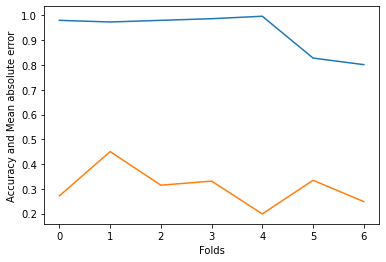

In [36]:
plt.plot(accuracy)
plt.plot(mae)
plt.xlabel('Folds')
plt.ylabel('Accuracy and Mean absolute error')
plt.legend


In [19]:
#pca method on single 80/20 data used originally using 85% variance retained
pca=PCA(0.85)
pca.fit(swtrainx)
#pca.n_components_
pcatrainx=pca.transform(swtrainx)
pcatestx=pca.transform(swtestx)
pcatrainx
#pcatestx
pca.explained_variance_ratio_


array([0.96016506])

In [20]:
#pca method on single 80/20 data used originally using 95% variance retained
pca=PCA(0.90)
pca.fit(swtrainx)
#pca.n_components_
pcatrainx=pca.transform(swtrainx)
pcatestx=pca.transform(swtestx)
pcatrainx
#pcatestx
pca.explained_variance_ratio_

array([0.96016506])

In [21]:
#pca method on single 80/20 data used originally using 95% variance retained
pca=PCA(0.95)
pca.fit(swtrainx)
#pca.n_components_
pcatrainx=pca.transform(swtrainx)
pcatestx=pca.transform(swtestx)
pcatrainx
#pcatestx
pca.explained_variance_ratio_

array([0.96016506])

In [22]:
#pca method on single 80/20 data used originally using 95% variance retained
pca=PCA(0.97)
pca.fit(swtrainx)
#pca.n_components_
pcatrainx=pca.transform(swtrainx)
pcatestx=pca.transform(swtestx)
pcatrainx
#pcatestx
pca.explained_variance_ratio_

array([0.96016506, 0.02108479])

In [23]:
#pca method on single 80/20 data used originally using 95% variance retained
pca=PCA(0.99)
pca.fit(swtrainx)
#pca.n_components_
pcatrainx=pca.transform(swtrainx)
pcatestx=pca.transform(swtestx)
pcatrainx
pca.n_components_
pca.explained_variance_ratio_
#pcatestx

array([0.96016506, 0.02108479, 0.01870875])

In [24]:
#pca method on single 80/20 data used originally using 95% variance retained
pca=PCA(n_components=5)
pca.fit(swtrainx)
#pca.n_components_
pcatrainx=pca.transform(swtrainx)
pcatestx=pca.transform(swtestx)
pcatrainx
pca.n_components_
pca.explained_variance_ratio_
#pcatestx

array([9.60165059e-01, 2.10847903e-02, 1.87087459e-02, 2.55160744e-05,
       5.81451411e-06])

In [25]:
#pca method on single 80/20 data used originally using 95% variance retained
pca=PCA(n_components=10)
pca.fit(swtrainx)
#pca.n_components_
pcatrainx=pca.fit_transform(swtrainx)
pcatestx=pca.transform(swtestx)
pca.n_components_
pca.explained_variance_ratio_
#pcatestx

array([9.60165059e-01, 2.10847903e-02, 1.87087459e-02, 2.55160744e-05,
       5.81451411e-06, 3.73393949e-06, 2.35224596e-06, 2.14133718e-06,
       6.24471077e-07, 5.63498855e-07])

In [37]:
#to collect mae data

#cross validation with 7 folds for log regression
k=7
folds=KFold(n_splits=k)
accuracy=[]
metrep=[]

for train_index,test_index in folds.split(kcvx):
    #x_train=[],x_test=[],y_train=[],y_test=[]
    x_train,x_test= kcvx.iloc[train_index,:],kcvx.iloc[test_index,:]
    y_train,y_test= kcvy.iloc[train_index,:],kcvy.iloc[test_index,]

    #print(train_index,test_index)
    visit_doc_model.fit(x_train,y_train)
    y_pred=visitdoc_ldamodel.predict(x_test)
    metrep.append(metrics.classification_report(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

Text(0, 0.5, 'Accuracy')

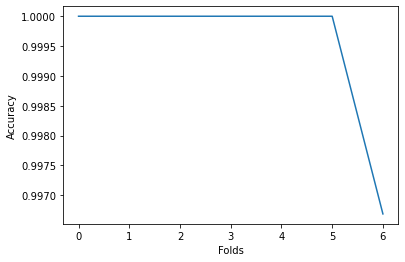

In [38]:
plt.plot(accuracy)
plt.xlabel('Folds')
plt.ylabel('Accuracy')

In [39]:
k=7
folds=KFold(n_splits=k)
accuracy=[]
metrep=[]

for train_index,test_index in folds.split(kcvx):
    #x_train=[],x_test=[],y_train=[],y_test=[]
    x_train,x_test= kcvx.iloc[train_index,:],kcvx.iloc[test_index,:]
    y_train,y_test= kcvy.iloc[train_index,:],kcvy.iloc[test_index,]

    #print(train_index,test_index)
    visit_doc_model.fit(x_train,y_train)
    y_pred=visitdoc_qdamodel.predict(x_test)
    metrep.append(metrics.classification_report(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Elisha Komolafe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

Text(0, 0.5, 'Accuracy')

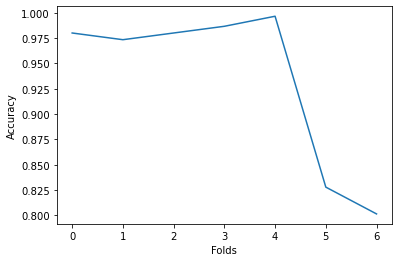

In [40]:
plt.plot(accuracy)
plt.xlabel('Folds')
plt.ylabel('Accuracy')
